<Strong> Multi-Class Classification </Strong>

<Strong> The dimensionality of the output space is much Larger. </Strong>

In [1]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


<p> Train Data is filled with news articles in the form of lists filled with index , corrosponding to words. Restricting to 10000 most common words. </p>

In [3]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[4]])

print(decoded_newswire)


565248/550378 [==============================] - 0s 0us/step
? seton co said its board has received a proposal from chairman and chief executive officer philip d ? to acquire seton for 15 75 dlrs per share in cash seton said the acquisition bid is subject to ? arranging the necessary financing it said he intends to ask other members of senior management to participate the company said ? owns 30 pct of seton stock and other management members another 7 5 pct seton said it has formed an independent board committee to consider the offer and has deferred the annual meeting it had scheduled for march 31 reuter 3


<Strong> Labels are integers between 0 - 45 (Multi-class) </Strong>

In [4]:
len(train_labels)

8982

In [5]:
def vectorize_sequences(sequences , dimension = 10000):
    
    # List with 8982 / 2246 Rows and 10,000 Columns (Max no. of words)
    results = np.zeros((len(sequences), dimension))
    
    for i , sequence in enumerate(sequences):
        results[i,sequence] = 1.
        
    return results

<Strong> train + test are now a matrix with (8982 / 2246) rows and 10,000 cols respectively </Strong>

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [7]:
def oneHot(labels , dimensions = 46):
    
    # List with 8982 / 2246 rows and 46 cols (one for each class)
    results = np.zeros((len(labels) , dimensions))
    
    for i , label in enumerate (labels):
        results[i,label] = 1.
        
    return results

<Strong> Train + Tests labels are now a matrix with (8982/2246) rows and 46 cols (one for each class) respectively. </Strong>

In [8]:
one_hot_train_labels = oneHot(train_labels)
one_hot_test_labels = oneHot(test_labels)

print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Strong> For each input, we output a 46-dimensional vector. Softmax function , distributes probability of 46 output classes. Sum to 1. </Strong>

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2022-01-24 10:47:37.315976: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 2.6646 - accuracy: 0.5430 - val_loss: 1.7811 - val_accuracy: 0.6280
Epoch 2/9
16/16 [==============================] - 0s 24ms/step - loss: 1.4693 - accuracy: 0.6999 - val_loss: 1.3211 - val_accuracy: 0.7110
Epoch 3/9
15/16 [===========================>..] - ETA: 0s - loss: 1.0816 - accuracy: 0.7714

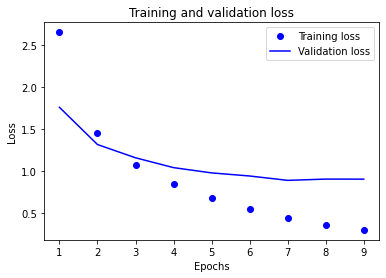

In [153]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

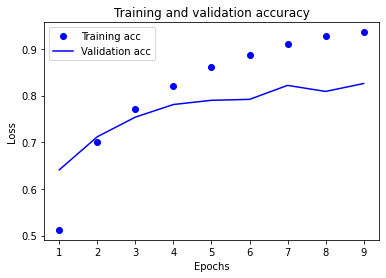

In [154]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [166]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 2.4966 - accuracy: 0.4989 - val_loss: 1.6842 - val_accuracy: 0.6200
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.3949 - accuracy: 0.6976 - val_loss: 1.2977 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.0416 - accuracy: 0.7734 - val_loss: 1.1288 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.8158 - accuracy: 0.8222 - val_loss: 1.0220 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 19ms/step - loss: 0.6509 - accuracy: 0.8622 - val_loss: 0.9564 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5204 - accuracy: 0.8935 - val_loss: 0.9195 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 21ms/step - loss: 0.4211 - accuracy: 0.9143 - val_loss: 0.9030 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

<Strong> Loss and Accuracy </Strong>

In [170]:
predicts= model.predict(x_test)

<Strong> For first example , whats index is the biggest (strongest probability , class). </Strong>

In [189]:
#print(np.argmax(predicts[0]))
#print(predicts[0][3])

3
0.88241637


In [ ]:
print(predicts)